In [1]:
import sys
import os


In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', 'C:\\Users\\seanm\\Anaconda3\\python36.zip', 'C:\\Users\\seanm\\Anaconda3\\DLLs', 'C:\\Users\\seanm\\Anaconda3\\lib', 'C:\\Users\\seanm\\Anaconda3', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\seanm\\.ipython', 'C:\\Users\\seanm\\OneDrive\\Documents\\Research\\GillesPy2']


In [3]:
sys.path


['',
 'C:\\Users\\seanm\\Anaconda3\\python36.zip',
 'C:\\Users\\seanm\\Anaconda3\\DLLs',
 'C:\\Users\\seanm\\Anaconda3\\lib',
 'C:\\Users\\seanm\\Anaconda3',
 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\seanm\\.ipython',
 'C:\\Users\\seanm\\OneDrive\\Documents\\Research\\GillesPy2']

In [4]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [5]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

Unable to use Cython optimized SSA:
Error:Building module gillespy2.cython_ssa_solver failed: ['distutils.errors.DistutilsPlatformError: Unable to find vcvarsall.bat\n']


In [6]:
import pyximport
from gillespy2.ssa_c_solver import SSACSolver


In [7]:
model = MichaelisMenten()


In [8]:
results = model.run(solver=SSACSolver, show_labels=False)


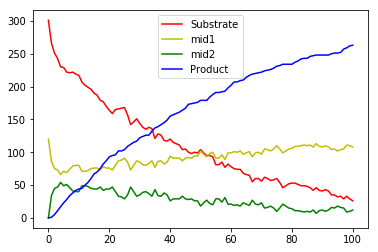

In [9]:
plt.plot(results[0][:,0],results[0][:,1],'-r', label='Substrate')
plt.plot(results[0][:,0],results[0][:,2],'-y', label='mid1')
plt.plot(results[0][:,0],results[0][:,3],'-g', label='mid2')
plt.plot(results[0][:,0],results[0][:,4],'-b', label='Product')
plt.plot([0],[11])
plt.legend(loc='best')

In [10]:
from gillespy2.ssa_c_multisolver import SSACMultiSolver

In [11]:
results = model.run(solver = SSACMultiSolver, show_labels=False)

TOTAL Runs: 700
TOTAL Time Elapsed: 29.140625 seconds.


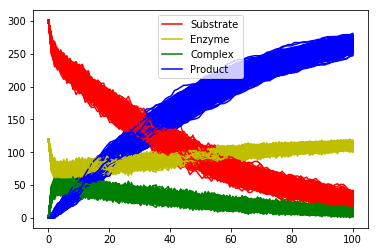

In [12]:
is_legend = False
for i in range(len(results)):
    plt.plot(results[0][:, 0],results[i][:, 1], '-r', label='Substrate')
    plt.plot(results[0][:, 0],results[i][:, 2], '-y', label='Enzyme')
    plt.plot(results[0][:, 0],results[i][:, 3], '-g', label='Complex')
    plt.plot(results[0][:, 0],results[i][:, 4], '-b', label='Product')
    if is_legend == False:
        plt.legend(loc='best')
        is_legend = True